In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('academic_performance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Step 1: Handle missing values and inconsistencies
# Identify missing values and inconsistencies
print(df.isna().sum())  # Check for missing values
print(df.describe())   # Check for inconsistencies

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [5]:

# If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
# In this example, let's replace missing values with the mean of the respective columns.
df.fillna(df.mean(), inplace=True)

In [6]:
# Step 2: Handle outliers
# Scan all numeric variables for outliers
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['math score', 'reading score', 'writing score']

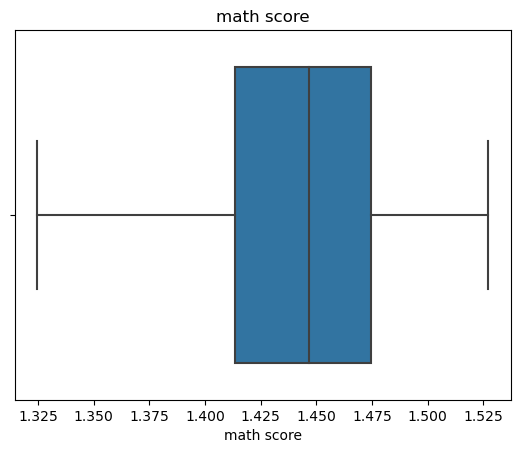

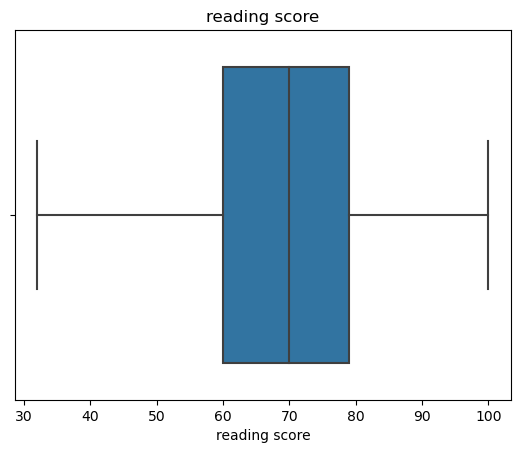

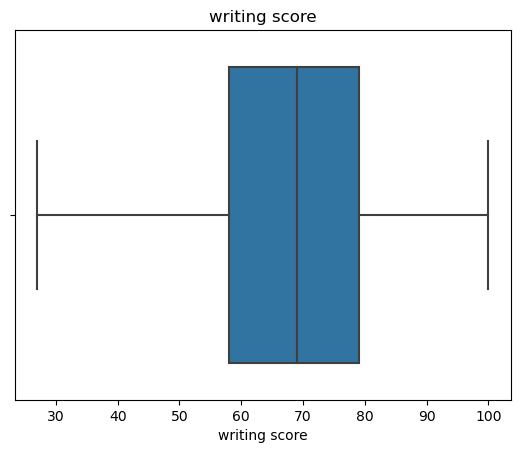

In [15]:
for col in numeric_cols:
    # Create boxplot to visualize outliers
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()
    
    # Calculate interquartile range (IQR)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Replace outliers with median value
    df[col] = np.where(df[col] < Q1 - 2.5*IQR, df[col].mean(), df[col])
    df[col] = np.where(df[col] > Q3 + 2.5*IQR, df[col].mean(), df[col])
    


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


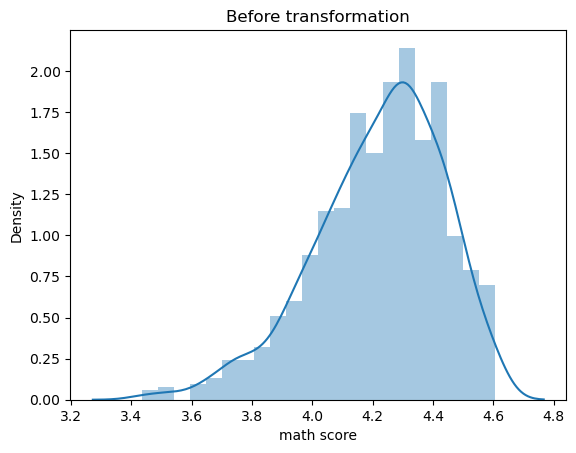

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


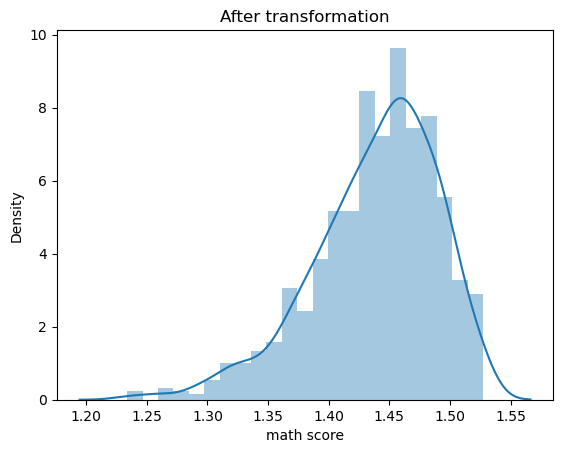

In [11]:

# Step 3: Data transformation
# Let's apply data transformation on 'math_score' variable to decrease the skewness and convert the distribution into a normal distribution.
sns.distplot(df['math score'])
plt.title('Before transformation')
plt.show()

df['math score'] = np.log(df['math score'])

sns.distplot(df['math score'])
plt.title('After transformation')
plt.show()
